# Data

Read in the three files: clients.csv, loans.csv, payments.csv. These files are related by the following:
1. The clients file is the parent of the loans file. Each client can have multiple distinct loans. The client_id column links the two files
2. The loans file is the child of the clients file and the parent of the payments file. Each loan can have multiple distinct payments associated with it. The loan_id column links the two files.

In [2]:
import pandas as pd
clients = pd.read_csv("../data/clients.csv", parse_dates=["joined"])
loans = pd.read_csv("../data/loans.csv", parse_dates=["loan_start","loan_end"]) 
payments = pd.read_csv("../data/payments.csv", parse_dates=["payment_date"])

In [3]:
clients.head()

,client_id,joined,income,credit_score
0,46109,2002-04-16,172677,527
1,49545,2007-11-14,104564,770
2,41480,2013-03-11,122607,585
3,46180,2001-11-06,43851,562
4,25707,2006-10-06,211422,621


In [4]:
loans.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [5]:
payments.head()

,loan_id,payment_amount,payment_date,missed
0,10243,2369,2002-05-31,1
1,10243,2439,2002-06-18,1
2,10243,2662,2002-06-29,0
3,10243,2268,2002-07-20,0
4,10243,2027,2002-07-31,1


In [6]:
# Verify information on payments dataframe
payments

,loan_id,payment_amount,payment_date,missed
0,10243,2369,2002-05-31,1
1,10243,2439,2002-06-18,1
2,10243,2662,2002-06-29,0
3,10243,2268,2002-07-20,0
4,10243,2027,2002-07-31,1
...,...,...,...,...
3451,11434,428,2010-06-07,1
3452,11434,496,2010-07-23,0
3453,11434,600,2010-09-07,1
3454,11434,468,2010-10-01,0


# Section 1 Questions

With the above datasets, answer the following questions. Show the steps taken to produce your final answer.

## 1. Give the 5 client IDs with the highest mean payment amount

In [7]:
# Join payments and loan dataframes on the loan_id column so the client_id is available on the new dataframe
client_payment = payments.join(loans.set_index(["loan_id"]),
    lsuffix="_x",
    rsuffix="_y",
    on=["loan_id"],
)
client_payment

,loan_id,payment_amount,payment_date,missed,client_id,loan_type,loan_amount,repaid,loan_start,loan_end,rate
0,10243,2369,2002-05-31,1,46109,home,13672,0,2002-04-16,2003-12-20,2.15
1,10243,2439,2002-06-18,1,46109,home,13672,0,2002-04-16,2003-12-20,2.15
2,10243,2662,2002-06-29,0,46109,home,13672,0,2002-04-16,2003-12-20,2.15
3,10243,2268,2002-07-20,0,46109,home,13672,0,2002-04-16,2003-12-20,2.15
4,10243,2027,2002-07-31,1,46109,home,13672,0,2002-04-16,2003-12-20,2.15
...,...,...,...,...,...,...,...,...,...,...,...
3451,11434,428,2010-06-07,1,26945,home,3643,0,2010-03-24,2011-12-22,0.13
3452,11434,496,2010-07-23,0,26945,home,3643,0,2010-03-24,2011-12-22,0.13
3453,11434,600,2010-09-07,1,26945,home,3643,0,2010-03-24,2011-12-22,0.13
3454,11434,468,2010-10-01,0,26945,home,3643,0,2010-03-24,2011-12-22,0.13


In [8]:
# Group by client_id and mean payment amount and do a descending sort of data to get the ordered clients by mean payment
paying_clients = client_payment.groupby("client_id").payment_amount.mean().sort_values(axis=0, ascending=False)
paying_clients

client_id
49545    1481.188482
29841    1439.433333
49624    1419.099010
32885    1396.495652
46109    1375.560284
46958    1346.413043
38537    1340.682927
41480    1246.509934
26695    1207.433824
49068    1204.308725
48177    1199.715190
39384    1193.630137
46180    1186.550336
25707    1178.552795
26326    1166.736842
39505    1162.026490
41472    1129.076190
26945    1109.473214
35089    1094.748428
44601    1087.762821
35214    1076.987952
44387    1055.752294
32961    1039.053435
42320    1021.483333
32726     944.298013
Name: payment_amount, dtype: float64

### Answer:
With this information we can get the first 5 datapoints and display the top 5 paying clients

In [9]:
# Slice the series to display the top 5 paying clients
paying_clients[0:5]

client_id
49545    1481.188482
29841    1439.433333
49624    1419.099010
32885    1396.495652
46109    1375.560284
Name: payment_amount, dtype: float64

## 2. How many unique loans have been given out to clients who joined prior to 2001?

In [10]:
# Join clients and loan dataframes on the client_id column so the joined column is available on the new dataframe
client_loans = clients.join(loans.set_index(["client_id"]),
    lsuffix="_x",
    rsuffix="_y",
    on=["client_id"],
)
client_loans

,client_id,joined,income,credit_score,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,2002-04-16,172677,527,home,13672,0,10243,2002-04-16,2003-12-20,2.15
0,46109,2002-04-16,172677,527,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
0,46109,2002-04-16,172677,527,home,12734,1,10990,2006-02-01,2007-07-05,0.68
0,46109,2002-04-16,172677,527,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
0,46109,2002-04-16,172677,527,credit,14049,1,11415,2010-07-07,2012-05-21,3.13
...,...,...,...,...,...,...,...,...,...,...,...
24,26945,2000-11-26,214516,806,other,12963,0,10330,2001-11-26,2004-06-11,2.46
24,26945,2000-11-26,214516,806,credit,1728,1,10248,2004-01-27,2005-06-21,5.27
24,26945,2000-11-26,214516,806,other,9329,0,10154,2001-12-17,2004-07-22,5.65
24,26945,2000-11-26,214516,806,home,4197,0,10333,2003-10-16,2005-07-10,4.50


In [11]:
# feature engineering and add a year column
client_loans = client_loans.assign(year=client_loans["joined"].dt.year,
                                  month=client_loans["joined"].dt.month)
# Sanity check
client_loans.head()

,client_id,joined,income,credit_score,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,year,month
0,46109,2002-04-16,172677,527,home,13672,0,10243,2002-04-16,2003-12-20,2.15,2002,4
0,46109,2002-04-16,172677,527,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,2002,4
0,46109,2002-04-16,172677,527,home,12734,1,10990,2006-02-01,2007-07-05,0.68,2002,4
0,46109,2002-04-16,172677,527,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,2002,4
0,46109,2002-04-16,172677,527,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,2002,4


In [12]:
# group new dataframe by unique years
loan_years = client_loans.groupby("year").loan_id.nunique()
loan_years

year
2000    49
2001    36
2002    70
2003    18
2004    72
2006    39
2007    20
2008    19
2009    32
2010    20
2011    33
2012    15
2013    20
Name: loan_id, dtype: int64

### Answer:
With this information at hand, we now know that **49** unique loans were issued before 2001.

## 3. What is the mean number of payments missed by clients with a credit score of less than 700 and who have missed more than 50 payments?

### We will need:
- the **missed** column from the *payments* dataframe
- the **credit_score** column from the *clients* dataframe

In [13]:
# We will join the client_payments dataframe with the clients dataframe 
payment_score = client_payment.join(client_loans.set_index(["loan_id",'client_id', 'loan_type', 'loan_amount', 'repaid', 'loan_start',
       'loan_end', 'rate']),
    
    on=["loan_id",'client_id', 'loan_type', 'loan_amount', 'repaid', 'loan_start',
       'loan_end', 'rate'],
)
payment_score

,loan_id,payment_amount,payment_date,missed,client_id,loan_type,loan_amount,repaid,loan_start,loan_end,rate,joined,income,credit_score,year,month
0,10243,2369,2002-05-31,1,46109,home,13672,0,2002-04-16,2003-12-20,2.15,2002-04-16,172677,527,2002,4
1,10243,2439,2002-06-18,1,46109,home,13672,0,2002-04-16,2003-12-20,2.15,2002-04-16,172677,527,2002,4
2,10243,2662,2002-06-29,0,46109,home,13672,0,2002-04-16,2003-12-20,2.15,2002-04-16,172677,527,2002,4
3,10243,2268,2002-07-20,0,46109,home,13672,0,2002-04-16,2003-12-20,2.15,2002-04-16,172677,527,2002,4
4,10243,2027,2002-07-31,1,46109,home,13672,0,2002-04-16,2003-12-20,2.15,2002-04-16,172677,527,2002,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3451,11434,428,2010-06-07,1,26945,home,3643,0,2010-03-24,2011-12-22,0.13,2000-11-26,214516,806,2000,11
3452,11434,496,2010-07-23,0,26945,home,3643,0,2010-03-24,2011-12-22,0.13,2000-11-26,214516,806,2000,11
3453,11434,600,2010-09-07,1,26945,home,3643,0,2010-03-24,2011-12-22,0.13,2000-11-26,214516,806,2000,11
3454,11434,468,2010-10-01,0,26945,home,3643,0,2010-03-24,2011-12-22,0.13,2000-11-26,214516,806,2000,11


In [14]:
# Make a new dataframe of credit scores below 700
below700 = payment_score[payment_score['credit_score'] < 700 ]
below700

,loan_id,payment_amount,payment_date,missed,client_id,loan_type,loan_amount,repaid,loan_start,loan_end,rate,joined,income,credit_score,year,month
0,10243,2369,2002-05-31,1,46109,home,13672,0,2002-04-16,2003-12-20,2.15,2002-04-16,172677,527,2002,4
1,10243,2439,2002-06-18,1,46109,home,13672,0,2002-04-16,2003-12-20,2.15,2002-04-16,172677,527,2002,4
2,10243,2662,2002-06-29,0,46109,home,13672,0,2002-04-16,2003-12-20,2.15,2002-04-16,172677,527,2002,4
3,10243,2268,2002-07-20,0,46109,home,13672,0,2002-04-16,2003-12-20,2.15,2002-04-16,172677,527,2002,4
4,10243,2027,2002-07-31,1,46109,home,13672,0,2002-04-16,2003-12-20,2.15,2002-04-16,172677,527,2002,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3323,10891,2075,2013-04-28,0,32885,other,4949,1,2010-07-02,2012-12-26,1.48,2002-05-13,58955,642,2002,5
3324,10891,1998,2013-05-26,1,32885,other,4949,1,2010-07-02,2012-12-26,1.48,2002-05-13,58955,642,2002,5
3325,10891,1228,2013-06-25,0,32885,other,4949,1,2010-07-02,2012-12-26,1.48,2002-05-13,58955,642,2002,5
3326,10891,1406,2013-07-27,0,32885,other,4949,1,2010-07-02,2012-12-26,1.48,2002-05-13,58955,642,2002,5


### Answer

In [15]:
# group by client_id that have missed more than 50 payments and get the mean of the values
mean_missed_payments = below700.groupby("client_id").missed.sum().mean()
mean_missed_payments

67.58823529411765

# Section 2 Questions

Create the following visualizations:
    
## 1. Create a histogram of the payment amounts. Briefly describe the distribution.

In [16]:
import seaborn as sb

### Answer

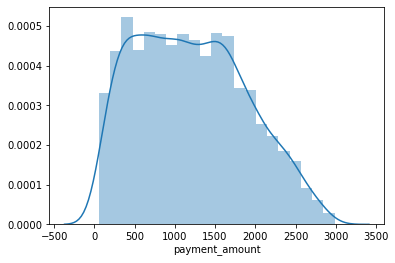

In [17]:
from matplotlib import pyplot as plt
payment_amounts = payments["payment_amount"]
sb.distplot(payment_amounts, kde = True)
plt.show()

#### Histogram description:
 The histogram displays a slightly positively skewed platykurtic distribution

## 2. Produce a line plot the cumulative sum of the number of clients by year.


In [18]:
# group new dataframe by count of unique clients by year
year_clients = client_loans.groupby("year").client_id.nunique()
year_clients

year
2000    3
2001    2
2002    4
2003    1
2004    4
2006    2
2007    1
2008    1
2009    2
2010    1
2011    2
2012    1
2013    1
Name: client_id, dtype: int64

### Answer

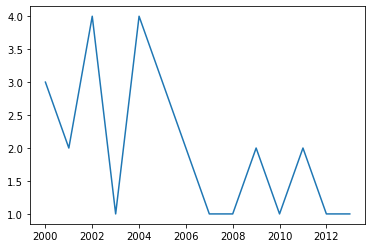

In [19]:
sb.lineplot(data=year_clients)

## 3. Produce a scatter plot of the percentage of payments missed in december for each year in the dataset.

In [20]:
# Parse dates into month and year
december_payments = payments.assign(year=payments["payment_date"].dt.year,
                                    month=payments["payment_date"].dt.month)

# Make dataframe of only december payments
december_payments = december_payments[december_payments["month"]==12]
december_payments

,loan_id,payment_amount,payment_date,missed,year,month
6,10984,1466,2003-12-29,0,2003,12
25,11415,1813,2010-12-24,0,2010,12
31,11501,1251,2006-12-12,0,2006,12
32,11501,1107,2006-12-30,1,2006,12
53,11611,1897,2012-12-10,1,2012,12
...,...,...,...,...,...,...
3403,10812,1981,2009-12-17,1,2009,12
3423,10248,173,2004-12-05,0,2004,12
3430,11215,939,2005-12-07,1,2005,12
3431,11215,1141,2005-12-18,0,2005,12


### Answer

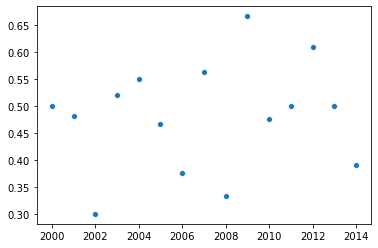

In [21]:
# group data by year and by mean missed payments
sb.scatterplot(data=december_payments.groupby("year").missed.mean())